Using haptools simgenotype, I am going to run a simple simulation of an admixture event between olives and yellows.
Origins chosen are Gog_Woreda and Mikumi, as they are the least admixed with a still good sample size.

It was run with the following options:
haptools simgenotype --model gog_mikumi_50gen.dat  --mapdir map_files/ --chroms 8 --ref_vcf ../chr8/chr8.phased.rehead.vcf.gz --sample_info aut.tsv --out chr8_gog_mik.vcf.gz

Model is
10  Admix  Gog_Woreda    Mikumi
1   0   0.8    0.2
50   1   0    0

In [1]:
%run ../scripts/notebook_settings_lean.py
from scipy import stats
from horizonplot import horizonplot
from chromwindow import window
import zarr
import allel
pd.options.display.float_format = '{:10,.3g}'.format #

meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")

In [2]:
meta_data_samples.loc[meta_data_samples.PGDP_ID.isin(["PD_0200", "PD_0678", "PD_0501"])]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
11,PD_0200,11SNF1101115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.7,-2,11,"Anubis, Tanzania"
85,PD_0501,26 / 37SNF1221115,Knauf/Chuma/Roos,Papio,anubis,"Serengeti, Tanzania",F,"Serengeti, Mara, Lake Zone, Tanzania",34.7,-2,85,"Anubis, Tanzania"
110,PD_0678,106 / 12LMF2210815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.8,-3.62,110,"Anubis, Tanzania"


In [3]:
meta_data_samples.loc[meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
152,PD_0720,39955_CK_01,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,152,"Anubis, Ethiopia"
153,PD_0721,39956_CK_02,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",F,"Gambrella National Park, Ethiopia",34.2,8.07,153,"Anubis, Ethiopia"
154,PD_0722,39957_CK_05,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,154,"Anubis, Ethiopia"
155,PD_0723,39958_RY_01,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,155,"Anubis, Ethiopia"
156,PD_0724,39959_RY_15,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",F,"Gambrella National Park, Ethiopia",34.2,8.07,156,"Anubis, Ethiopia"
157,PD_0725,39961_CK_03,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,157,"Anubis, Ethiopia"
158,PD_0726,39962_CK_04,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",F,"Gambrella National Park, Ethiopia",34.2,8.07,158,"Anubis, Ethiopia"
159,PD_0727,39964_CK_06,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,159,"Anubis, Ethiopia"
160,PD_0728,39965_CK_07,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,160,"Anubis, Ethiopia"
161,PD_0729,39966_CM_01,Rogers,Papio,anubis,"Gog Woreda, Gambella region, Ethiopia",M,"Gambrella National Park, Ethiopia",34.2,8.07,161,"Anubis, Ethiopia"


In [4]:
meta_data_samples["S_Origin"] = [x.split(",")[0].replace(" ", "_") for x in meta_data_samples.Origin]

In [5]:
meta_data_samples["S_Origin"]

0        Mikumi
1        Mikumi
2      Aberdare
3      Aberdare
4        Chunga
         ...   
222      Chunga
223      Chunga
224      Chunga
225      Chunga
226      Chunga
Name: S_Origin, Length: 227, dtype: object

In [6]:
meta_data_samples[["PGDP_ID", "S_Origin"]].to_csv("/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/sim_haptools/aut.tsv",
                                               sep="\t", header=False, index=False)

Generating a map file with recomb positions.

In [7]:
path_to_genetic_map = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/mikumi_pyrho_genetic_map_chr{}.txt"
path_to_map_file = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/chr{}/chr{}.map"

In [8]:
for c in []:#["8"]:
    rmap = pd.read_csv(path_to_genetic_map.format(c), sep=" ")
    map_file = pd.read_csv(path_to_map_file.format(c,c ), sep="\t", names=["chrom", "rs_id", "cM", "bp"])
    map_file["cM"] = map_file.bp.map(dict(zip(rmap.position, rmap["Genetic_Map(cM)"])))
    map_file.to_csv("/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/sim_haptools/map_files/chr{}.map".format(c),
                                               sep="\t", header=False, index=False)

In [9]:
#map_file["cM"] = map_file.bp.map(dict(zip(rmap.position, rmap["Genetic_Map(cM)"])))

Rfmix results read

In [10]:
def create_paint_df_ind_compressed(df, ind, mapping, ns_map):
    d = {}
    max_pos = int(df.epos.iloc[-1])
    df = df.loc[df[ind].shift() != df[ind]].reset_index()
    df["epos"] = pd.concat([df.spos.iloc[1:], pd.Series(max_pos)], ignore_index=True)
    d["pos"] = df.spos
    d["end_pos"] = df.epos -1
    d["length"] = df.epos - df.spos
    d["reference"] = df[ind].map(mapping)
    d["n/s"] = d["reference"].map(ns_map)
    d["individual"] = ind[:-2]
    d["haplotype"] = ind[-1:]
    return pd.DataFrame(d)

meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/aut_sim_gog_mik/"
mapping_df = pd.read_csv("/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/tanzania_focus/" + \
                         "ref_names.txt", sep = "\t", names=["ID", "Origin"])

pop_mapping = {}
o_order = sorted((mapping_df.Origin.unique()))
for o in range(len((mapping_df.Origin.unique()))):
    pop_mapping[o_order[o]] = o

north_south_mapping = {'Hamadryas, Ethiopia': 1,
 'Kindae, Zambia': 0,
 'Papio, Senegal': 1,
 'Ursinus, Zambia': 0}

df_l = []
for chrom in ["chr8"]: #["chr{}".format(x) for x in (range(1, 21))]+["all_chrX", "female_chrX"]:
    print(chrom)
    input_file = rfmix_path + "{}.msp.tsv".format(chrom)
    chr_df = pd.read_csv(input_file, sep = "\t", header=1)
    file = open(input_file, 'r')
    line1 = file.readline()
    file.close()
    number_subpop_mapping = {}
    for subpop in line1.strip().split("\t"):
        # Splitting to create lists containing two values - subpop and number.
        subpop_number = subpop.split(": ")[-1].split("=")
        number_subpop_mapping[int(subpop_number[1])] = subpop_number[0]
    for hap in chr_df.columns[6:]:
        paint_df = create_paint_df_ind_compressed(chr_df, hap, number_subpop_mapping, north_south_mapping)
        paint_df["chrom"] = "{}".format(chrom)
        df_l.append(paint_df)
length_df = pd.concat(df_l)

chr8


In [11]:
from ete3 import Tree

def plot_tree(t, ax, leaf_colors=None, show_inner_nodes=False, fontsize=10, 
              text_offset=None, margins=(0.5, 1, 0.5, 1)): # top, right, bottom, left

    y_offset = len(t.get_leaves())
    for node in t.traverse("preorder"):
        node.x_offset = node.dist + sum(x.dist for x in node.get_ancestors())
        if node.is_leaf():
            y_offset -= 1
            node.y_offset = y_offset

    for node in t.traverse("postorder"):
        if not node.is_leaf():
            node.y_offset = sum(x.y_offset for x in node.children) / len(node.children)

    horizontal_lines = list()
    vertical_lines = list()
    node_coords = list()
    leaf_coords = list()
    max_x_offset = 0
    for node in t.traverse("postorder"):
        max_x_offset = max(max_x_offset, node.x_offset)
        node_coords.append((node.x_offset, node.y_offset))
        if node.is_leaf():
            leaf_coords.append([node.name, node.x_offset, node.y_offset])
        if not node.is_root():
            y = node.y_offset
            horizontal_lines.append(([node.up.x_offset, node.x_offset], [y, y]))
        if not node.is_leaf():
            c = sorted(node.children, key=lambda x: x.y_offset)
            bottom, top = c[0], c[-1]
            x = node.x_offset
            vertical_lines.append(([x, x],[bottom.y_offset, top.y_offset]))

    
    # shift the tree to put leaves at zero
    for i in range(len(horizontal_lines)):
        horizontal_lines[i][0][0] -= max_x_offset
        horizontal_lines[i][0][1] -= max_x_offset
    for i in range(len(vertical_lines)):
        vertical_lines[i][0][0] -= max_x_offset
        vertical_lines[i][0][1] -= max_x_offset
    for i in range(len(leaf_coords)):
        leaf_coords[i][1] -= max_x_offset
            
    # draw the tree:
    for x in horizontal_lines:
        ax.plot(*x, c='black', linewidth=0.8)
    for x in vertical_lines:
        ax.plot(*x, c='black', linewidth=0.8)

#     for tup in node_coords:
#         ax.plot(*tup, c='black', marker="o")

    if text_offset is None:
        text_offset = max_x_offset / 20
        
    for name, x, y in leaf_coords:
        ax.text(x+text_offset, y, name, fontsize=fontsize,
                verticalalignment='center', horizontalalignment='left')
        if leaf_colors is None:
            color = 'black'
        else:
            color = leaf_colors[name]
        ax.plot(x, y, c=color, marker="o", ms=3)


#     ax.set_xlim(-margins[3], max_x_offset + margins[1])
    ax.set_xlim(-margins[3]-max_x_offset, margins[1])
    ax.set_ylim(-margins[2], len(leaf_coords)-1+margins[0])


    #ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    
    return leaf_coords

def jc(seq1, seq2, case_sensitive=True):
    assert len(seq1) == len(seq2), (len(seq1), len(seq2))
    tot, diff = 0, 0
    for x, y in zip(seq1, seq2):
        if not case_sensitive:
            x, y = x.upper(), y.upper()
        if x in 'ATCG' and y in 'ATCG':
            if x != y:
                diff += 1
            tot += 1    
    if not tot:
        return np.nan
    elif diff:
        distance = -3/4 * math.log(1 - 4/3 * diff/tot)
    else:
        distance = 0.0
    return distance


def dist_matrix(seq_list, case_sensitive=True, dist_fun=jc):
    n = len(seq_list)
    mat = np.zeros((n, n))

    upper_trag_idx = list(zip(*np.triu_indices(n, k=1)))
#     seq_pairs = [(seq_list[i], seq_list[j]) for i, j in upper_trag_idx]
    args = [(seq_list[i], seq_list[j], case_sensitive) for i, j in upper_trag_idx]

    jc_distances = []
    for a, b, c in args:
        jc_distances.append(dist_fun(a, b, c))
    
    # with Pool(int(os.environ['SLURM_CPUS_PER_TASK'])) as p:
    #     jc_distances = p.starmap(dist_fun, args)

    for (i, j), d in zip(upper_trag_idx, jc_distances):
        mat[i][j] = d
        mat[j][i] = mat[i][j]

    return mat


def prune_nans(mat, name_list):

    # Find rows (and cols) where all off-diagonal entries are nan:
    mask = np.isnan(mat).sum(axis=0) == np.size(mat, axis=0)-1
    delete = [i for (i, delete) in enumerate(mask) if delete]
    # remove those rows and cols:
    mat = np.delete(mat, delete, axis=0)
    mat = np.delete(mat, delete, axis=1)
    # update name list:
    name_list = [name for (i, name) in enumerate(name_list) if i not in delete]
    
    # if there are any nans left we have to remove all row/cols with a nan:
    if np.isnan(mat).any():    
        # in that case we could do this to remove all row/cols with a nan
        mask = np.isnan(mat).sum(axis=0).astype('bool')
        delete = [i for (i, delete) in enumerate(mask) if delete]
        # remove those rows and cols:
        mat = np.delete(mat, delete, axis=0)
        mat = np.delete(mat, delete, axis=1)
        # update name list:
        name_list = [name for (i, name) in enumerate(name_list) if i not in delete]
        
    return mat, name_list

def find_lowest_cell(table):
    x = 1
    y = 0
    min_val = table[x][y]
    for i in range(len(table)):
        for j in range(len(table[i])):
            if table[i][j] < min_val:
                min_val = table[i][j]
                x = i
                y = j
    return [x, y]

def link(x, y, wx, wy):
    return (x * wx + y * wy) / (wx + wy)

def update_table(table, a, b, weight_a, weight_b):
    for i in range(0, b):
        table[b][i] = link(table[b][i], table[a][i], weight_b, weight_a)
    for j in range(b+1, a):
        table[j][b] = link(table[j][b], table[a][j], weight_b, weight_a)
    for i in range(a+1, len(table)):
        table[i][b] = link(table[i][b], table[i][a], weight_b, weight_a)
    for i in range(a+1, len(table)):
        del table[i][a]
    del table[a] 

def update_labels(labels, i, j, di, dj):
    labels[j] = "({}:{},{}:{})".format(labels[j], dj, labels[i], di)
    del labels[i]

def upgma(mat, names):

    table = mat[:]
    labels = names[:]
    node_heights = [0 for _ in labels]

    while len(labels) > 1:
        i, j = find_lowest_cell(table)
        
        dist = table[i][j]

        wi = max(1, labels[i].count(':'))
        wj = max(1, labels[j].count(':'))

        new_node_height = dist / 2
        di = new_node_height - node_heights[i]
        dj = new_node_height - node_heights[j]
        
        update_table(table, i, j, wi, wj)
        update_labels(labels, i, j, di, dj)
        node_heights[j] = new_node_height
        del node_heights[i]
        
    return labels[0] + ';'

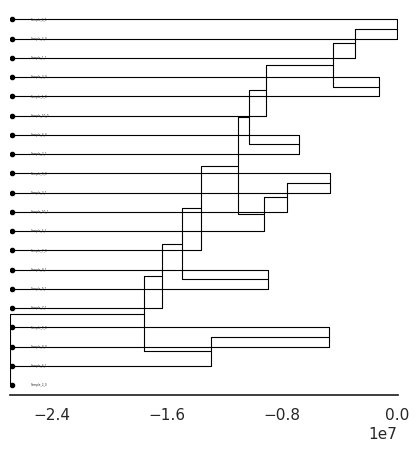

In [12]:
length_df["haplo_ID"] = length_df.individual +"_"+ length_df.haplotype
length_df["start"] = length_df.pos
length_df["north"] = length_df["n/s"]*2-1
length_df["total_north"] = length_df["north"]*length_df.length
length_df["is_north"] = [1 if x == 1 else 0 for x in length_df.north]
length_df["is_south"] = [0 if x == 1 else 1 for x in length_df.north]

haplo_ID_list = list(length_df.haplo_ID.unique())

north_south_segment_lists = []
for sample_name in haplo_ID_list:
    north_tuples = list(length_df.loc[(length_df.haplo_ID == sample_name) & (length_df.is_north == 1), ['pos', 'end_pos']].itertuples(index=False, name=None))
    south_tuples = list(length_df.loc[(length_df.haplo_ID == sample_name) & (length_df.is_north == 0), ['pos', 'end_pos']].itertuples(index=False, name=None))
    north_south_segment_lists.append((north_tuples, south_tuples))
    
def tree_newick(name_list, seq_list, case_sensitive=True, dist_fun=jc):

    mat = dist_matrix(seq_list, case_sensitive=case_sensitive, dist_fun=dist_fun)
    mat, name_list = prune_nans(mat, name_list)
    
    lowtri = [lst[:i] for (i, lst) in enumerate(mat.tolist())]
    newick_str = upgma(lowtri, name_list)
    return newick_str

def order_tree(t, key=lambda c: len(c.get_leaves())):
    """
    without key for sorting it makes a comb tree by default
    """
    for node in t.traverse():
        if not node.is_leaf():
            node.children = sorted(node.children, key=key, reverse=False)

def remove_outgroup(name):
    tree.set_outgroup( tree&name )
    all_leaves = tree.get_leaf_names()
    all_leaves.remove(name)
    tree.prune(all_leaves, preserve_branch_length=False)

def tot_overlap(arr1, arr2):
    """total overlap of two lists of intervals"""
    tot = 0
    i = j = 0
    n = len(arr1)
    m = len(arr2)
    while i < n and j < m:
        l = max(arr1[i][0], arr2[j][0])
        r = min(arr1[i][1], arr2[j][1])
        if l <= r: 
            tot += r - l
        if arr1[i][1] < arr2[j][1]:
            i += 1
        else:
            j += 1
    return tot

def proportion_same_ancestry(*args):
    """proportion of chromsome with same ancestry"""
    a, b, case_sensitive = args
    ovl = tot_overlap(a[0], b[0]) + tot_overlap(a[1], b[1])
    return 77000000 - ovl
    
newick_str = tree_newick(haplo_ID_list, north_south_segment_lists, dist_fun=proportion_same_ancestry)
tree = Tree(newick_str)

def order_fun(c):
    """order child clades so that leaves in left has more north ancestry"""
    leaf_names = [x.name for x in c.get_leaves()]
    idx = [haplo_ID_list.index(x) for x in leaf_names]
    return sum(e-s for i in idx for (s, e) in north_south_segment_lists[i][1]) - sum(e-s for i in idx for (s, e) in north_south_segment_lists[i][0])

order_tree(tree, key=order_fun)

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(5, 5))

leaf_info = plot_tree(tree, ax1, fontsize=2)
haplo_ID_sorting, x, y = zip(*leaf_info)

In [13]:
length_df.loc[length_df.north == 1].length.sum()/length_df.length.sum()

0.8259854042154013

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


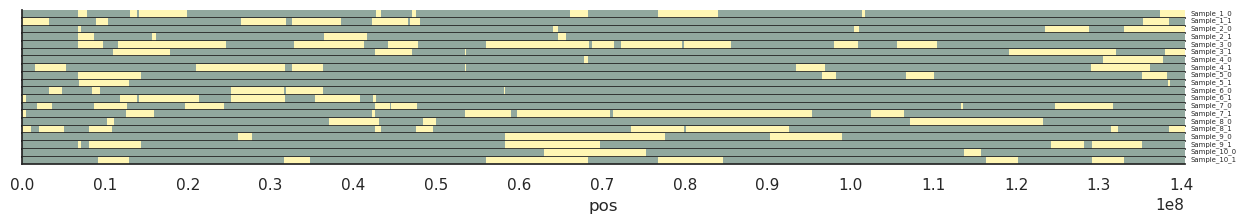

In [14]:
def stairs(df, start='pos', end='end_pos', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

g = sns.FacetGrid(stairs(length_df).sort_values(["pos", "haplo_ID"]), col='chrom', row='haplo_ID', sharex=True, sharey=True, height=0.1, aspect=150,
                    margin_titles=True, gridspec_kws={'hspace':0.0})
plot_df = stairs(length_df).sort_values(["pos", "haplo_ID"])
haplo_ID_sorting = length_df.haplo_ID.unique()

# Colors
hamadryas_north = '#91a89e'
olive_north = '#495F43'
yellow_south = '#FFF6B4'

g.map(plt.fill_between, 
    'pos', 
    'is_north', 
    y2=0,
    color=hamadryas_north,
    linewidth=0,
    capstyle='butt')
g.map(plt.fill_between, 
    'pos', 
    'is_south', 
    y2=0,
    color=yellow_south,
    linewidth=0,
    capstyle='butt')
g.set_titles(col_template="", row_template="")
g.set(yticklabels=[])  
g.set(ylabel=None)
g.tick_params(left=False)  # remove the ticks 
for label, ax in zip(haplo_ID_sorting, g.axes.flat):
    ax.set_xlim(plot_df.pos.min(), plot_df.pos.max())
    ax.set_ylim(0, 1)    
    ax.annotate(label, xy=(1.005 , 0.5), xycoords='axes fraction', ha='left', size=5)
    ax.set_xticks(np.arange(0, max(plot_df.pos)+1, 10000000))

Checking the breakpoints file

In [15]:
pos_l, end_pos_l, haplo_ID_l, orig_l = [], [], [], []
f = open("/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/sim_haptools/chr8_gog_mik.bp")

for l in f.readlines():
    if l[:6] == "Sample":
        haplo_ID = l.strip()
        prev_pos = 0
    else:
        split_bp = l.strip().split("\t")
        pos_l.append(int(prev_pos))
        end_pos_l.append(int(split_bp[2]))
        prev_pos = split_bp[2]
        orig_l.append(split_bp[0])
        haplo_ID_l.append(haplo_ID)

In [16]:
bp_df = pd.DataFrame({"pos": pos_l, "end_pos": end_pos_l, "haplo_ID": haplo_ID_l, "origin": orig_l})
bp_df["is_north"] = [1 if x == "Gog_Woreda" else 0 for x in bp_df.origin]
bp_df["is_south"] = [0 if x == "Gog_Woreda" else 1 for x in bp_df.origin]
bp_df["chrom"] = "chr8"

In [17]:
bp_df

,pos,end_pos,haplo_ID,origin,is_north,is_south,chrom
0,0,144376,Sample_1_1,Gog_Woreda,1,0,chr8
1,144376,1654293,Sample_1_1,Gog_Woreda,1,0,chr8
2,1654293,3445960,Sample_1_1,Gog_Woreda,1,0,chr8
3,3445960,3662719,Sample_1_1,Gog_Woreda,1,0,chr8
4,3662719,3748733,Sample_1_1,Gog_Woreda,1,0,chr8
...,...,...,...,...,...,...,...
1196,137898446,138419354,Sample_10_2,Mikumi,0,1,chr8
1197,138419354,139222818,Sample_10_2,Gog_Woreda,1,0,chr8
1198,139222818,139659248,Sample_10_2,Gog_Woreda,1,0,chr8
1199,139659248,140166837,Sample_10_2,Gog_Woreda,1,0,chr8


/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


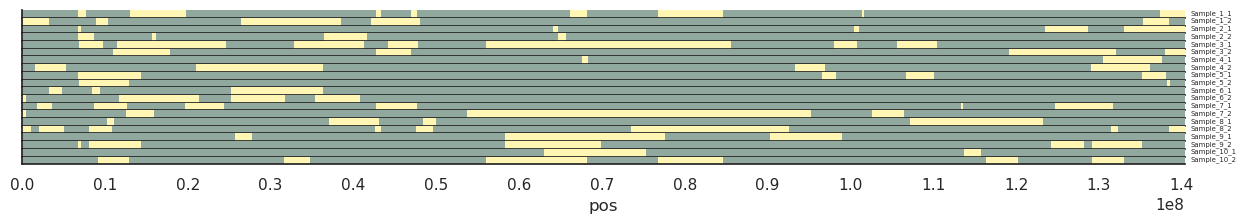

In [18]:
def stairs(df, start='pos', end='end_pos', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

g = sns.FacetGrid(stairs(bp_df).sort_values(["pos", "haplo_ID"]), col='chrom', row='haplo_ID', sharex=True, sharey=True, height=0.1, aspect=150,
                    margin_titles=True, gridspec_kws={'hspace':0.0})
plot_df = stairs(bp_df).sort_values(["pos", "haplo_ID"])
haplo_ID_sorting = bp_df.haplo_ID.unique()

# Colors
hamadryas_north = '#91a89e'
olive_north = '#495F43'
yellow_south = '#FFF6B4'

g.map(plt.fill_between, 
    'pos', 
    'is_north', 
    y2=0,
    color=hamadryas_north,
    linewidth=0,
    capstyle='butt')
g.map(plt.fill_between, 
    'pos', 
    'is_south', 
    y2=0,
    color=yellow_south,
    linewidth=0,
    capstyle='butt')
g.set_titles(col_template="", row_template="")
g.set(yticklabels=[])  
g.set(ylabel=None)
g.tick_params(left=False)  # remove the ticks 
for label, ax in zip(haplo_ID_sorting, g.axes.flat):
    ax.set_xlim(plot_df.pos.min(), plot_df.pos.max())
    ax.set_ylim(0, 1)    
    ax.annotate(label, xy=(1.005 , 0.5), xycoords='axes fraction', ha='left', size=5)
    ax.set_xticks(np.arange(0, max(bp_df.pos)+1, 10000000))

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


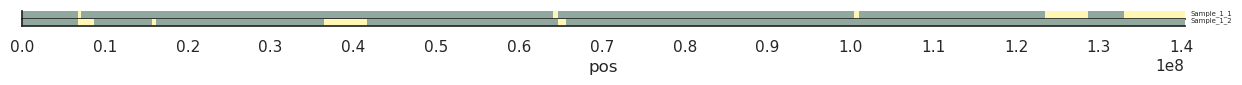

In [19]:
input_df = bp_df.loc[bp_df.haplo_ID.isin(["Sample_1_1", "Sample_1_2"])]

g = sns.FacetGrid(stairs(input_df).sort_values(["pos", "haplo_ID"]), col='chrom', row='haplo_ID', sharex=True, sharey=True, height=0.1, aspect=150,
                    margin_titles=True, gridspec_kws={'hspace':0.0})
plot_df = stairs(input_df).sort_values(["pos", "haplo_ID"])
haplo_ID_sorting = input_df.haplo_ID.unique()

# Colors
hamadryas_north = '#91a89e'
olive_north = '#495F43'
yellow_south = '#FFF6B4'

g.map(plt.fill_between, 
    'pos', 
    'is_north', 
    y2=0,
    color=hamadryas_north,
    linewidth=0,
    capstyle='butt')
g.map(plt.fill_between, 
    'pos', 
    'is_south', 
    y2=0,
    color=yellow_south,
    linewidth=0,
    capstyle='butt')
g.set_titles(col_template="", row_template="")
g.set(yticklabels=[])  
g.set(ylabel=None)
g.tick_params(left=False)  # remove the ticks 
for label, ax in zip(haplo_ID_sorting, g.axes.flat):
    ax.set_xlim(plot_df.pos.min(), plot_df.pos.max())
    ax.set_ylim(0, 1)    
    ax.annotate(label, xy=(1.005 , 0.5), xycoords='axes fraction', ha='left', size=5)
    ax.set_xticks(np.arange(0, max(plot_df.pos)+1, 10000000))

Counting how much is correctly identified.

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


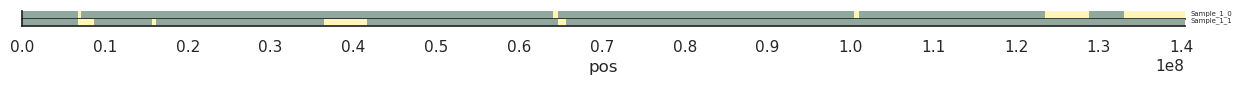

In [20]:
input_df = length_df.loc[length_df.haplo_ID.isin(["Sample_1_0", "Sample_1_1"])]

g = sns.FacetGrid(stairs(input_df), col='chrom', row='haplo_ID', sharex=True, sharey=True, height=0.1, aspect=150,
                    margin_titles=True, gridspec_kws={'hspace':0.0})
plot_df = stairs(input_df)
haplo_ID_sorting = input_df.haplo_ID.unique()

# Colors
hamadryas_north = '#91a89e'
olive_north = '#495F43'
yellow_south = '#FFF6B4'

g.map(plt.fill_between, 
    'pos', 
    'is_north', 
    y2=0,
    color=hamadryas_north,
    linewidth=0,
    capstyle='butt')
g.map(plt.fill_between, 
    'pos', 
    'is_south', 
    y2=0,
    color=yellow_south,
    linewidth=0,
    capstyle='butt')
g.set_titles(col_template="", row_template="")
g.set(yticklabels=[])  
g.set(ylabel=None)
g.tick_params(left=False)  # remove the ticks 
for label, ax in zip(haplo_ID_sorting, g.axes.flat):
    ax.set_xlim(plot_df.pos.min(), plot_df.pos.max())
    ax.set_ylim(0, 1)    
    ax.annotate(label, xy=(1.005 , 0.5), xycoords='axes fraction', ha='left', size=5)
    ax.set_xticks(np.arange(0, max(plot_df.pos)+1, 10000000))

In [21]:
length_df

,pos,end_pos,length,reference,n/s,individual,haplotype,chrom,haplo_ID,start,north,total_north,is_north,is_south
0,4263,744233,739971,"Hamadryas, Ethiopia",1,Sample_1,0,chr8,Sample_1_0,4263,1,739971,1,0
1,744234,1362155,617922,"Papio, Senegal",1,Sample_1,0,chr8,Sample_1_0,744234,1,617922,1,0
2,1362156,4840882,3478727,"Hamadryas, Ethiopia",1,Sample_1,0,chr8,Sample_1_0,1362156,1,3478727,1,0
3,4840883,5342572,501690,"Papio, Senegal",1,Sample_1,0,chr8,Sample_1_0,4840883,1,501690,1,0
4,5342573,6586363,1243791,"Hamadryas, Ethiopia",1,Sample_1,0,chr8,Sample_1_0,5342573,1,1243791,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,129670332,135309498,5639167,"Hamadryas, Ethiopia",1,Sample_10,1,chr8,Sample_10_1,129670332,1,5639167,1,0
42,135309499,138417816,3108318,"Kindae, Zambia",0,Sample_10,1,chr8,Sample_10_1,135309499,-1,-3108318,0,1
43,138417817,138735453,317637,"Hamadryas, Ethiopia",1,Sample_10,1,chr8,Sample_10_1,138417817,1,317637,1,0
44,138735454,139470411,734958,"Papio, Senegal",1,Sample_10,1,chr8,Sample_10_1,138735454,1,734958,1,0


In [22]:
bp_df

,pos,end_pos,haplo_ID,origin,is_north,is_south,chrom
0,0,144376,Sample_1_1,Gog_Woreda,1,0,chr8
1,144376,1654293,Sample_1_1,Gog_Woreda,1,0,chr8
2,1654293,3445960,Sample_1_1,Gog_Woreda,1,0,chr8
3,3445960,3662719,Sample_1_1,Gog_Woreda,1,0,chr8
4,3662719,3748733,Sample_1_1,Gog_Woreda,1,0,chr8
...,...,...,...,...,...,...,...
1196,137898446,138419354,Sample_10_2,Mikumi,0,1,chr8
1197,138419354,139222818,Sample_10_2,Gog_Woreda,1,0,chr8
1198,139222818,139659248,Sample_10_2,Gog_Woreda,1,0,chr8
1199,139659248,140166837,Sample_10_2,Gog_Woreda,1,0,chr8


In [23]:
import pandas as pd
import numpy as np
from chromwindow import window

@window(size=100000)
def north_sum(df):
    r = (df.end-df.start).sum()
    return r

def add_dummy(c_df):
    inds = c_df.individual.unique()
    dummy_df = pd.DataFrame({"individual": np.repeat(inds, 2)})
    dummy_df["haplotype"] = pd.Series(["0", "1"]*len(inds))
    dummy_df["end"], dummy_df["start"] = c_df.end.max(), c_df.end.max()
    dummy_df["chrom"] = c_df.chrom.unique()[0]
    return dummy_df

c_df = length_df.loc[(length_df["n/s"] == 1)]
c_df = c_df.rename(columns={"end_pos": "end"})
dummy_added = pd.concat([c_df[["individual", "haplotype", "end", "start", "chrom"]], add_dummy(c_df)])
window_df = dummy_added.groupby(['individual', 'haplotype']).apply(north_sum).reset_index(drop=True, level=-1).reset_index()

In [24]:
def add_dummy(c_df):
    inds = c_df.individual.unique()
    dummy_df = pd.DataFrame({"individual": np.repeat(inds, 2)})
    dummy_df["haplotype"] = pd.Series(["1", "2"]*len(inds))
    dummy_df["end"], dummy_df["start"] = c_df.end.max(), c_df.end.max()
    dummy_df["chrom"] = c_df.chrom.unique()[0]
    return dummy_df

b_df = bp_df.loc[(bp_df["is_north"] == 1)]
b_df = b_df.rename(columns={"end_pos": "end", "pos": "start"})
b_df["individual"] = b_df.haplo_ID.str[:-2]
b_df["haplotype"] = b_df.haplo_ID.str[-1:]
dummy_added = pd.concat([b_df[["individual", "haplotype", "end", "start", "chrom"]], add_dummy(b_df)])
bp_df_window = dummy_added.groupby(['individual', 'haplotype']).apply(north_sum).reset_index(drop=True, level=-1).reset_index()

In [25]:
mean_df = window_df.groupby(["individual", "start", "end"]).mean().reset_index()
mean_bp_df = bp_df_window.groupby(["individual", "start", "end"]).mean().reset_index()

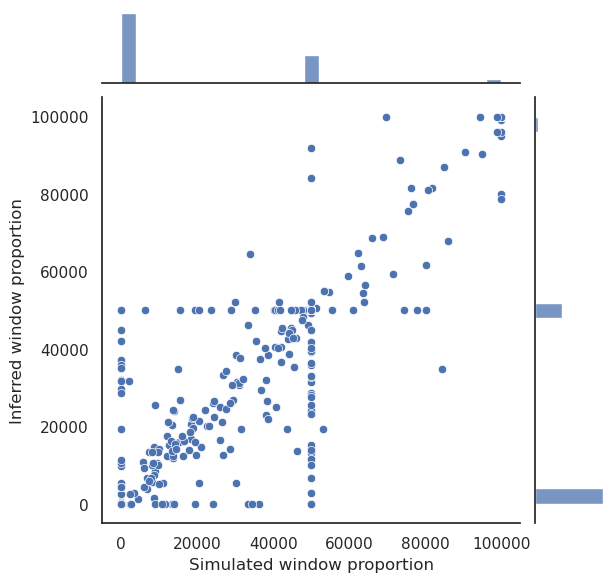

In [32]:
g = sns.jointplot(y=100000-mean_df.north_sum, x=100000-mean_bp_df.north_sum)
g.set_axis_labels("Simulated window proportion", "Inferred window proportion")

In [27]:
from scipy import stats
stats.spearmanr(mean_df.north_sum, mean_bp_df.north_sum)

SignificanceResult(statistic=0.9641443674941644, pvalue=0.0)

In [28]:
stats.pearsonr(mean_df.north_sum, mean_bp_df.north_sum)

PearsonRResult(statistic=0.9893258827176521, pvalue=0.0)

In [29]:
mean_df["w_l"] = window_df.end-window_df.start
1-mean_df.north_sum.sum()/mean_df.w_l.sum()

0.17436390918803424

In [30]:
mean_bp_df["w_l"] = mean_bp_df.end-mean_bp_df.start
1-mean_bp_df.north_sum.sum()/mean_bp_df.w_l.sum()

0.175816004985755

In [31]:
stats.ttest_ind(mean_df.north_sum, mean_bp_df.north_sum)

Ttest_indResult(statistic=0.44672455530590127, pvalue=0.655077395425556)

In [32]:
mean_df["Window Status"] = ["Olive" if x> 900000 else "Mixed" for x in mean_df.north_sum]
mean_bp_df["Window Status"] = ["Olive" if x> 900000 else "Mixed" for x in mean_bp_df.north_sum]

Checking whether Expected Diversity is unbiased in simulation predictions.

In [33]:
zarr_chrX_dir = "/home/eriks/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset_f = zarr.open_group(zarr_chrX_dir, mode="r")
gt_f = allel.GenotypeArray(callset_f["calldata/GT"])
pos_f = callset_f["variants/POS"][:]

zarr_all_chrX_dir = "/home/eriks/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/all_chrX"
#Opening the zarr data
callset_all_chrX = zarr.open_group(zarr_all_chrX_dir, mode="r")
gt_all_chrX = allel.GenotypeArray(callset_all_chrX["calldata/GT"])
pos_all_chrX = callset_all_chrX["variants/POS"][:]

zarr_dipmale_chrX = "/home/eriks/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/dipmale_chrX"
#Opening the zarr data
callset_dipmale_chrX = zarr.open_group(zarr_dipmale_chrX, mode="r")

hap_starter = pd.read_csv("../data/haploid_metadata.txt", sep =" ")
meta_data_samples_sci = pd.read_csv("../data/Papio_metadata_with_clustering_sci.txt", sep =" ")
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")

#Generate a mapping between metadata and callset - repeat for chrX females to be sure of no errors.
ID_to_callset = dict(zip(callset_all_chrX["samples"][:], range(len(callset_all_chrX["samples"][:]))))
hap_meta_data_samples = hap_starter.loc[hap_starter.PGDP_ID.isin(callset_all_chrX["samples"][:])].copy()
hap_meta_data_samples["callset_index"] = hap_meta_data_samples.PGDP_ID.map(ID_to_callset)

ID_to_callset_f = dict(zip(callset_f["samples"][:], range(len(callset_f["samples"][:]))))
meta_data_samples_f = meta_data_samples_sci.loc[meta_data_samples_sci.PGDP_ID.isin(callset_f["samples"][:])].copy()
meta_data_samples_f["callset_index"] = meta_data_samples_f.PGDP_ID.map(ID_to_callset_f)

ID_to_callset_dip = dict(zip(callset_dipmale_chrX["samples"][:], range(len(callset_dipmale_chrX["samples"][:]))))
meta_data_samples_dip = meta_data_samples_sci.loc[meta_data_samples_sci.PGDP_ID.isin(callset_dipmale_chrX["samples"][:])].copy()
meta_data_samples_dip["callset_index"] = meta_data_samples_dip.PGDP_ID.map(ID_to_callset_dip)

In [34]:
focus_pop_tags = ["Chunga, Zambia", "Dendro Park, Zambia", "Niokolo-Koba, Senegal", "Filoha, Ethiopia"]
window_size = 100000
all_chroms = ["chr{}".format(x) for x in (range(1, 21))]+["chrX"]

c_df_l = []
for c in all_chroms:
    print(c)
    zarr_dir = "/home/eriks/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/" + c
    #Opening the zarr data
    callset = zarr.open_group(zarr_dir, mode="r")
    gt = allel.GenotypeArray(callset["calldata/GT"])
    pos = callset["variants/POS"][:]
    # Loading in the IDs and gt
    df_l = []
    for p in focus_pop_tags:
        if c == "chrX":
            metadata = meta_data_samples_f
            focus_pop_gt = gt.take(metadata.loc[(metadata.Origin == p) &
                                            (metadata.Sex == "F")].callset_index,
                       axis=1)
        else:
            metadata = meta_data_samples
            focus_pop_gt = gt.take(metadata.loc[metadata.Origin == p].callset_index,
                       axis=1)
        pi, windows, n_bases, counts = allel.windowed_diversity(pos, focus_pop_gt.count_alleles(),
                          size=window_size, start=0)
        df_l.append(pd.DataFrame({"chrom": c, "population": p, "start": windows[:,0], "diversity": pi}))
    focus_df = pd.concat(df_l)
    if c == "chrX":
        rf_c = "female_chrX"
    elif c == "dipmale_chrX":
        rf_c = "all_chrX"
    else:
        rf_c = c
    print(c, rf_c)
    c_df_l.append(focus_df)
diversity_df = pd.concat(c_df_l)


chr1
chr1 chr1
chr2
chr2 chr2
chr3
chr3 chr3
chr4
chr4 chr4
chr5
chr5 chr5
chr6
chr6 chr6
chr7
chr7 chr7
chr8
chr8 chr8
chr9
chr9 chr9
chr10
chr10 chr10
chr11
chr11 chr11
chr12
chr12 chr12
chr13
chr13 chr13
chr14
chr14 chr14
chr15
chr15 chr15
chr16
chr16 chr16
chr17
chr17 chr17
chr18
chr18 chr18
chr19
chr19 chr19
chr20
chr20 chr20
chrX
chrX female_chrX


In [35]:
from scipy import stats
for i in range(len(focus_pop_tags)):
    aut_diversity = diversity_df.loc[(diversity_df.population == focus_pop_tags[i]) & (diversity_df.chrom != "chrX")]
    x_diversity = diversity_df.loc[(diversity_df.population == focus_pop_tags[i]) & (diversity_df.chrom == "chrX")]
    print(focus_pop_tags[i], x_diversity.diversity.mean()/aut_diversity.diversity.mean())

Chunga, Zambia 0.3769497281265172
Dendro Park, Zambia 0.3547333619621744
Niokolo-Koba, Senegal 0.3459008968171557
Filoha, Ethiopia 0.434701993898475


In [36]:
mean_diversity = diversity_df.groupby(["chrom", "start"])[["diversity"]].mean().reset_index()

In [37]:
from scipy import stats
for i in mean_diversity.chrom.unique():
    schr_diversity = mean_diversity.loc[(mean_diversity.chrom == i)]
    #x_diversity = diversity_df.loc[(diversity_df.population == focus_pop_tags[i]) & (diversity_df.chrom == "chrX")]
    print(i, schr_diversity.diversity.mean())

chr1 0.001617264105443145
chr10 0.0018331111764846775
chr11 0.0016125613561964794
chr12 0.0017146431067534508
chr13 0.0017324603414504553
chr14 0.0016514946384904256
chr15 0.0016412913638878075
chr16 0.0017883541005979796
chr17 0.0019012326508490262
chr18 0.001951913939411075
chr19 0.002144926795935957
chr2 0.0016753063902036553
chr20 0.0019985594409158308
chr3 0.0017886122215746943
chr4 0.001837107403582853
chr5 0.0017918323918155914
chr6 0.0017349679902366347
chr7 0.0016235101094527501
chr8 0.0018161815946848923
chr9 0.001731262172920567
chrX 0.0006683420350033091


In [38]:
mean_diversity.loc[mean_diversity.chrom == "chr8"]

,chrom,start,diversity
23283,chr8,0,0.0016
23284,chr8,100000,0.00215
23285,chr8,200000,0.00161
23286,chr8,300000,0.00131
23287,chr8,400000,0.00193
...,...,...,...
24682,chr8,139900000,0.00117
24683,chr8,140000000,0.00169
24684,chr8,140100000,0.00207
24685,chr8,140200000,0.00247


In [39]:
mean_div = mean_df.merge(mean_diversity.loc[mean_diversity.chrom == "chr8"], on="start")

In [40]:
mean_div

,individual,start,end,haplotype,north_sum,w_l,Window Status,chrom,diversity
0,Sample_1,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016
1,Sample_10,0,100000,0.5,4.79e+04,100000,Mixed,chr8,0.0016
2,Sample_2,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016
3,Sample_3,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016
4,Sample_4,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016
...,...,...,...,...,...,...,...,...,...
14035,Sample_5,140300000,140400000,0.5,4.49e+04,100000,Mixed,chr8,0.00355
14036,Sample_6,140300000,140400000,0.5,4.49e+04,100000,Mixed,chr8,0.00355
14037,Sample_7,140300000,140400000,0.5,2.25e+04,100000,Mixed,chr8,0.00355
14038,Sample_8,140300000,140400000,0.5,4.49e+04,100000,Mixed,chr8,0.00355


In [41]:
import statsmodels.formula.api as smf

glm_results = smf.glm(formula = "north_sum ~ diversity", data=mean_div).fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              north_sum   No. Observations:                14040
Model:                            GLM   Df Residuals:                    14038
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                      7.3964e+08
Method:                          IRLS   Log-Likelihood:            -1.6328e+05
Date:                Fri, 18 Oct 2024   Deviance:                   1.0383e+13
Time:                        09:11:03   Pearson chi2:                 1.04e+13
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0003797
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.409e+04    698.922    120.311      0.000    8.27e+04    8.55e+04
diversity  -8.393e+05   3.63e+05     -2.309      0.021   -1.55e+06   -1.27e+05
==============================================================================
"""

In [42]:
rfmix_path = "/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/steps/rfmix_gen100/tanzania_focus/"

df_l = []
chroms = ["chr{}".format(x) for x in (range(1, 21))]+["all_chrX"]
for c in chroms:
    read_file = rfmix_path + "{}.windows.txt".format(c)
    df = pd.read_csv(read_file, sep="\t")
    df_l.append(df)
window_df_tanz = pd.concat(df_l)
mean_window_df_tanz = window_df_tanz.groupby(["chrom", "individual", "start", "end"]).mean().reset_index()
tanz_olives = meta_data_samples_sci.loc[meta_data_samples_sci.C_origin == "Anubis, Tanzania"].PGDP_ID
mean_window_df_tanz_olive = mean_window_df_tanz.loc[mean_window_df_tanz.individual.isin(tanz_olives)]

c_r_g_df = pd.read_csv("../steps/rfmix_stats_df/call_recomb_genes.txt")

window_df_tanz["Origin"] = window_df_tanz.individual.map(dict(zip(meta_data_samples_sci.PGDP_ID, meta_data_samples_sci.Origin)))

In [43]:
mean_window_df_tanz = window_df_tanz.groupby(["chrom", "Origin", "start", "end"])[["north_sum"]].mean().reset_index()
admix_div_mean = mean_diversity.merge(mean_window_df_tanz, on=["chrom", "start"])
admix_div_mean["Species"] = admix_div_mean.Origin.map(dict(zip(meta_data_samples_sci.Origin, meta_data_samples_sci.Species)))
admix_div_mean = admix_div_mean.merge(c_r_g_df, on=["chrom", "start"])
admix_div_mean = admix_div_mean.loc[admix_div_mean.chrom != "all_chrX"]
admix_div_mean["North Percentage"] = admix_div_mean.north_sum/100000
admix_div_mean["logdiv"] = np.log10(admix_div_mean.diversity)
admix_div_mean["logrecomb"] = np.log10(admix_div_mean.average_cM_window)
admix_div_mean["norm_diversity"] = (admix_div_mean.diversity-admix_div_mean.diversity.mean())/admix_div_mean.diversity.std()
admix_div_mean["norm_recomb"] = (admix_div_mean.average_cM_window-admix_div_mean.average_cM_window.mean())/admix_div_mean.average_cM_window.std()

In [44]:
#Selecting the cases of interest and setting Minor Parent Ancestry
origins_interest = ['Arusha, Tanzania',
       'Gog Woreda, Gambella region, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia_eth_case',
       'Gombe, Tanzania', 'Issa Valley, Tanzania',
       'Katavi, Tanzania','Lake Manyara, Tanzania',
       'Mahale, Tanzania',
       'Mikumi, Tanzania', 'Ngorongoro, Tanzania', 'Ruaha, Tanzania',
       'Selous, Tanzania', 'Serengeti, Tanzania', 'Tarangire, Tanzania',
       'Udzungwa, Tanzania']
admix_div_mean = admix_div_mean.loc[admix_div_mean.Origin.isin(origins_interest)]
admix_div_mean["minor_parent_percentage"] = [x if y == ("cynocephalus") or z == "Gog Woreda, Gambella region, Ethiopia_eth_case"
                                             else 1-x for x, y, z in zip(admix_div_mean["North Percentage"],
                                                                         admix_div_mean["Species"],
                                                                        admix_div_mean["Origin"])]
admix_div_mean["local_minor_ancestry"] = [min(x, 1-x) for x in admix_div_mean["North Percentage"]]

In [45]:
prune_starts = admix_div_mean.loc[(admix_div_mean.callable_frac < 0.5) |
                              (admix_div_mean.diversity <= 0.000513) |
                                 (admix_div_mean.diversity >= 0.00499)].start
prune_starts

61           400000
62           400000
63           400000
64           400000
65           400000
            ...    
381104    125700000
381105    125700000
381106    125700000
381107    125700000
381108    125700000
Name: start, Length: 4278, dtype: int64

In [46]:
mean_div["minor_parent_ancestry"] = 1-mean_div.north_sum/100000
mean_group =  mean_div.groupby(["chrom", "start", "end"])[["minor_parent_ancestry", "diversity"]].mean().reset_index()
mean_group.loc[~mean_group.start.isin(prune_starts)]

,chrom,start,end,minor_parent_ancestry,diversity
1,chr8,100000,200000,0.2,0.00215
2,chr8,200000,300000,0.2,0.00161
3,chr8,300000,400000,0.2,0.00131
9,chr8,900000,1000000,0.1,0.00274
10,chr8,1000000,1100000,0.0606,0.0024
...,...,...,...,...,...
1398,chr8,139800000,139900000,0.2,0.00111
1399,chr8,139900000,140000000,0.2,0.00117
1400,chr8,140000000,140100000,0.2,0.00169
1401,chr8,140100000,140200000,0.2,0.00207


In [47]:
mean_bp_df["minor_parent_ancestry"] = 1-mean_bp_df.north_sum/100000
mean_bp_df = mean_bp_df.merge(mean_diversity.loc[mean_diversity.chrom == "chr8"], on="start")
mean_bp_df

,individual,start,end,haplotype,north_sum,w_l,Window Status,minor_parent_ancestry,chrom,diversity
0,Sample_1,0,100000,6,1e+05,100000,Mixed,0,chr8,0.0016
1,Sample_10,0,100000,6,7e+04,100000,Mixed,0.3,chr8,0.0016
2,Sample_2,0,100000,6,1e+05,100000,Mixed,0,chr8,0.0016
3,Sample_3,0,100000,6,1e+05,100000,Mixed,0,chr8,0.0016
4,Sample_4,0,100000,6,1e+05,100000,Mixed,0,chr8,0.0016
...,...,...,...,...,...,...,...,...,...,...
14035,Sample_5,140300000,140400000,6,4.66e+04,100000,Mixed,0.534,chr8,0.00355
14036,Sample_6,140300000,140400000,6,4.66e+04,100000,Mixed,0.534,chr8,0.00355
14037,Sample_7,140300000,140400000,6,2.33e+04,100000,Mixed,0.767,chr8,0.00355
14038,Sample_8,140300000,140400000,6,4.66e+04,100000,Mixed,0.534,chr8,0.00355


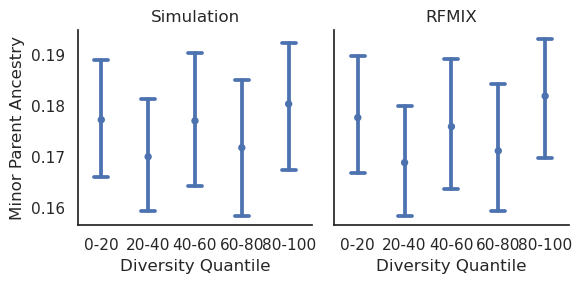

In [48]:
mean_group = mean_div.groupby(["chrom", "start", "end"])[["minor_parent_ancestry", "diversity"]].mean().reset_index()
mean_group_bp = mean_bp_df.groupby(["start", "end"])[["minor_parent_ancestry", "diversity"]].mean().reset_index()
mean_group["Sim or RFMIX"] = "RFMIX"
mean_group_bp["Sim or RFMIX"] = "Simulation"
mean_group_concat = pd.concat([mean_group_bp,mean_group])
mean_group_concat["Diversity Quantile"] = pd.qcut(mean_group_concat.diversity, 5,
                                                       labels=["0-20","20-40",
                                                              "40-60","60-80",
                                                              "80-100"])
g = sns.FacetGrid(mean_group_concat.loc[~(mean_group_concat.start.isin(prune_starts))], col="Sim or RFMIX")
g.map_dataframe(sns.pointplot, y="minor_parent_ancestry", x="Diversity Quantile", 
                linestyles="none", capsize=.3, errorbar=("ci", 95), scale = 0.6)
#g.map_dataframe(sns.stripplot, x="minor_parent_percentage", y="Diversity Quantile", alpha=0.05)
#g.set(xlim=(0, 0.25))
g.set_titles(col_template="{col_name}")
g.set(xlabel="Diversity Quantile", ylabel="Minor Parent Ancestry")

In [49]:
mean_div

,individual,start,end,haplotype,north_sum,w_l,Window Status,chrom,diversity,minor_parent_ancestry
0,Sample_1,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016,0.0426
1,Sample_10,0,100000,0.5,4.79e+04,100000,Mixed,chr8,0.0016,0.521
2,Sample_2,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016,0.0426
3,Sample_3,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016,0.0426
4,Sample_4,0,100000,0.5,9.57e+04,100000,Mixed,chr8,0.0016,0.0426
...,...,...,...,...,...,...,...,...,...,...
14035,Sample_5,140300000,140400000,0.5,4.49e+04,100000,Mixed,chr8,0.00355,0.551
14036,Sample_6,140300000,140400000,0.5,4.49e+04,100000,Mixed,chr8,0.00355,0.551
14037,Sample_7,140300000,140400000,0.5,2.25e+04,100000,Mixed,chr8,0.00355,0.775
14038,Sample_8,140300000,140400000,0.5,4.49e+04,100000,Mixed,chr8,0.00355,0.551


In [50]:
mean_group

,chrom,start,end,minor_parent_ancestry,diversity,Sim or RFMIX
0,chr8,0,100000,0.234,0.0016,RFMIX
1,chr8,100000,200000,0.2,0.00215,RFMIX
2,chr8,200000,300000,0.2,0.00161,RFMIX
3,chr8,300000,400000,0.2,0.00131,RFMIX
4,chr8,400000,500000,0.135,0.00193,RFMIX
...,...,...,...,...,...,...
1399,chr8,139900000,140000000,0.2,0.00117,RFMIX
1400,chr8,140000000,140100000,0.2,0.00169,RFMIX
1401,chr8,140100000,140200000,0.2,0.00207,RFMIX
1402,chr8,140200000,140300000,0.2,0.00247,RFMIX


In [51]:
mean_group_bp

,start,end,minor_parent_ancestry,diversity,Sim or RFMIX
0,0,100000,0.171,0.0016,Simulation
1,100000,200000,0.2,0.00215,Simulation
2,200000,300000,0.2,0.00161,Simulation
3,300000,400000,0.2,0.00131,Simulation
4,400000,500000,0.128,0.00193,Simulation
...,...,...,...,...,...
1399,139900000,140000000,0.2,0.00117,Simulation
1400,140000000,140100000,0.2,0.00169,Simulation
1401,140100000,140200000,0.2,0.00207,Simulation
1402,140200000,140300000,0.2,0.00247,Simulation


In [52]:
low_mean = mean_group.loc[mean_group["Diversity Quantile"] == "0-20"][["minor_parent_ancestry"]].mean()[0]*100
high_mean = mean_group.loc[mean_group["Diversity Quantile"] == "80-100"][["minor_parent_ancestry"]].mean()[0]*100

KeyError: 'Diversity Quantile'

In [ ]:
low_mean, high_mean, high_mean/low_mean

In [53]:
glm_results = smf.glm(formula = "minor_parent_ancestry ~ diversity", data=mean_group.loc[(~mean_group.start.isin(prune_starts))]).fit()
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     minor_parent_ancestry   No. Observations:                 1141
Model:                               GLM   Df Residuals:                     1139
Model Family:                   Gaussian   Df Model:                            1
Link Function:                  Identity   Scale:                       0.0085730
Method:                             IRLS   Log-Likelihood:                 1097.1
Date:                   Fri, 18 Oct 2024   Deviance:                       9.7646
Time:                           11:19:55   Pearson chi2:                     9.76
No. Iterations:                        3   Pseudo R-squ. (CS):          8.146e-05
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1726      0.009     20.082      0.000       0.156       0.189
diversity      1.3499      4.470      0.302      0.763      -7.411      10.111
==============================================================================
"""

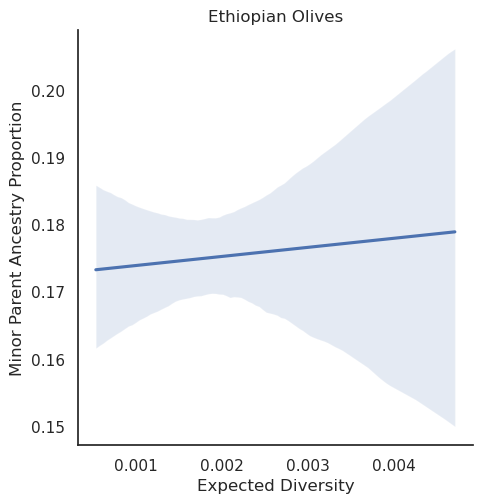

In [54]:
g = sns.lmplot(mean_group.loc[(~mean_group.start.isin(prune_starts))], y="minor_parent_ancestry", x="diversity", scatter=False)
g.set(ylabel="Minor Parent Ancestry Proportion", xlabel="Expected Diversity", title="Ethiopian Olives")
